In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [4]:
# Files to load
url = ('points_collision.csv')
points_collision = "points_collision.csv"

In [5]:
# Read the data file and store it in a Pandas DataFrame.
points_collision_df = pd.read_csv(points_collision)
points_collision_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,total_points_driver,average_col_acc
0,23782,989,20,6,5,3,1,1,1,25.0,58,29:33.3,5373283,53,4,01:26.5,220.782,1,636.00,0.04
1,23783,989,1,131,44,1,2,2,2,18.0,58,5.036,5378319,50,3,01:26.4,220.845,1,1555.50,0.01
2,23784,989,8,6,7,2,3,3,3,15.0,58,6.309,5379592,57,2,01:26.4,221.027,1,308.00,0.01
3,23785,989,817,9,3,8,4,4,4,12.0,58,7.069,5380352,54,1,01:25.9,222.128,1,458.00,0.04
4,23786,989,4,1,14,10,5,5,5,10.0,58,27.886,5401169,57,7,01:27.0,219.489,1,131.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,01:26.4,219.993,5,429.00,0.03
1615,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,01:29.3,212.912,3,7.00,0.10
1616,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,01:29.4,212.557,6,21.00,0.05
1617,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,01:30.6,209.732,6,19.00,0.08


In [6]:
# Determine if there are any missing values
points_collision_df.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 0
grid                   0
position               0
positionText           0
positionOrder          0
points                 0
laps                   0
time                   0
milliseconds           0
fastestLap             0
rank                   0
fastestLapTime         0
fastestLapSpeed        0
statusId               0
total_points_driver    0
average_col_acc        0
dtype: int64

In [7]:
# Determine data types for the DataFrame.
points_collision_df.dtypes

resultId                 int64
raceId                   int64
driverId                 int64
constructorId            int64
number                   int64
grid                     int64
position                object
positionText            object
positionOrder            int64
points                 float64
laps                     int64
time                    object
milliseconds            object
fastestLap              object
rank                     int64
fastestLapTime          object
fastestLapSpeed         object
statusId                 int64
total_points_driver     object
average_col_acc         object
dtype: object

In [8]:
# Transformaciones a algunas columnas.
points_collision_df['average_col_acc'] = points_collision_df['positionOrder'].astype('float64')
points_collision_df['total_points_driver'] = points_collision_df['grid'].astype('float64')


In [9]:
points_collision_df.describe()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,rank,statusId,total_points_driver,average_col_acc
count,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000
mean,24593.916615,1029.849907,654.443484,70.034589,28.008647,10.155652,10.494132,5.066399,54.329216,9.730080,9.167387,10.155652,10.494132
std,468.826216,24.518031,336.038982,85.504719,25.666323,5.818685,5.765005,7.218282,17.921190,5.881244,19.116254,5.818685,5.765005
min,23782.000000,989.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,24187.500000,1009.000000,807.000000,4.000000,8.000000,5.000000,5.500000,0.000000,52.000000,5.000000,1.000000,5.000000,5.500000
50%,24595.000000,1029.000000,830.000000,9.000000,18.000000,10.000000,10.000000,1.000000,56.000000,10.000000,3.000000,10.000000,10.000000
75%,24999.500000,1052.000000,842.000000,131.000000,44.000000,15.000000,15.000000,8.000000,67.000000,15.000000,11.000000,15.000000,15.000000
max,25404.000000,1073.000000,854.000000,214.000000,99.000000,20.000000,20.000000,27.000000,87.000000,20.000000,139.000000,20.000000,20.000000


In [10]:
points_collision_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,total_points_driver,average_col_acc
0,23782,989,20,6,5,3,1,1,1,25.0,58,29:33.3,5373283,53,4,01:26.5,220.782,1,3.0,1.0
1,23783,989,1,131,44,1,2,2,2,18.0,58,5.036,5378319,50,3,01:26.4,220.845,1,1.0,2.0
2,23784,989,8,6,7,2,3,3,3,15.0,58,6.309,5379592,57,2,01:26.4,221.027,1,2.0,3.0
3,23785,989,817,9,3,8,4,4,4,12.0,58,7.069,5380352,54,1,01:25.9,222.128,1,8.0,4.0
4,23786,989,4,1,14,10,5,5,5,10.0,58,27.886,5401169,57,7,01:27.0,219.489,1,10.0,5.0


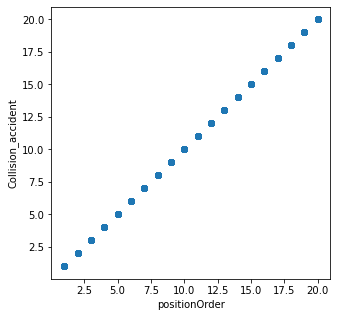

In [13]:
# Gráfico correlación entre choques y accidentes y resultado final
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=points_collision_df.positionOrder, y=points_collision_df.average_col_acc, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('Collision_accident');

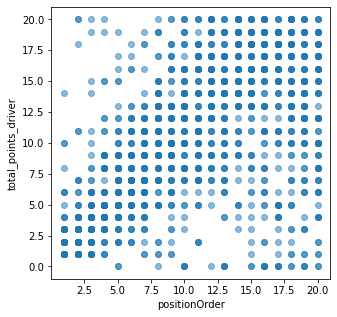

In [12]:
# Gráfico correlación entre puntos acumulados y resultado final
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=points_collision_df.positionOrder, y=points_collision_df.total_points_driver, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('total_points_driver');